# BinWaves example in Cantabria (Reconstruction)

**In this notebook**: 
<br><br>
Here waves are reconstructed in a selected grid.
<br><br>
Steps:
- Kp propagation coefficients and hindcast reconstruction is made at a grid.

In [1]:
import xarray as xr

# Load all the gridded kps and reproject

kp_coeffs = xr.open_dataset("outputs/kp_coefficients_NORTH.nc")
kp_coeffs

<xarray.Dataset> Size: 2GB
Dimensions:   (case_num: 225, site: 281, freq: 38, dir: 120)
Coordinates:
  * case_num  (case_num) int64 2kB 0 1 2 3 4 5 6 ... 218 219 220 221 222 223 224
  * site      (site) int64 2kB 1 2 3 4 5 6 7 8 ... 275 276 277 278 279 280 281
  * freq      (freq) float64 304B 0.03 0.033 0.0363 0.0399 ... 0.8273 0.9096 1.0
  * dir       (dir) float64 960B 1.5 4.5 7.5 10.5 ... 349.5 352.5 355.5 358.5
    utm_x     (site) float64 2kB ...
    utm_y     (site) float64 2kB ...
Data variables:
    kps       (case_num, site, freq, dir) float64 2GB ...

In [2]:
import pandas as pd
from utils.operations import transform_ERA5_spectrum

model_parameters = pd.read_csv("outputs/swan_cases.csv").to_dict(orient="list")

# Load interest spectra

offshore_spectra, offshore_spectra_case = transform_ERA5_spectrum(
    era5_spectrum=xr.open_dataset("outputs/ERA5_offshore_spectra.nc"),
    subset_parameters=model_parameters,
    available_case_num=kp_coeffs.case_num.values,
)
offshore_spectra_case

<xarray.DataArray 'efth' (case_num: 225, time: 17520)> Size: 32MB
array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [9.21052658e-05, 9.22648774e-05, 9.37976276e-05, ...,
        1.21189880e-04, 1.27898696e-04, 1.34887239e-04],
       [4.04577357e-05, 4.08553964e-05, 4.19816247e-05, ...,
        5.65294200e-05, 5.74575032e-05, 6.00530407e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.14144622e-05, 2.12261527e-05, 2.19957586e-05]])
Coordinates:
  * case_num   (case_num) int64 2kB 0 1 2 3 4 5 6 ... 219 220 221 222 223 224
    longitude  float32 4B 356.1
    latitude   float32 4B 43.82
  * time       (time) datetime64[ns] 140kB 2009-01-01 ... 2010-12-31T23:00:00

In [3]:
from bluemath_tk.waves.binwaves import reconstruc_spectra

# Reconstruct spectra

time_to_reconstruct = "2010-02-20"

reconstructed_onshore_spectra = reconstruc_spectra(
    offshore_spectra=offshore_spectra_case.sel(time=time_to_reconstruct),
    kp_coeffs=kp_coeffs,
)
reconstructed_onshore_spectra

INFO:distributed.http.proxy:To route to workers diagnostics web server please install jupyter-server-proxy: python -m pip install jupyter-server-proxy
INFO:distributed.scheduler:State start
INFO:distributed.diskutils:Found stale lock file and directory '/tmp/dask-scratch-space/scheduler-ofds3sve', purging
INFO:distributed.diskutils:Found stale lock file and directory '/tmp/dask-scratch-space/worker-gtkqii6y', purging
INFO:distributed.diskutils:Found stale lock file and directory '/tmp/dask-scratch-space/worker-noezux0f', purging
INFO:distributed.diskutils:Found stale lock file and directory '/tmp/dask-scratch-space/worker-dt4mckb1', purging
INFO:distributed.diskutils:Found stale lock file and directory '/tmp/dask-scratch-space/worker-iiawm_4j', purging
INFO:distributed.diskutils:Found stale lock file and directory '/tmp/dask-scratch-space/worker-9xzd8ljb', purging
INFO:distributed.diskutils:Found stale lock file and directory '/tmp/dask-scratch-space/worker-spnhwrig', purging
INFO:dist

<xarray.Dataset> Size: 246MB
Dimensions:    (site: 281, freq: 38, dir: 120, time: 24)
Coordinates:
  * site       (site) int64 2kB 1 2 3 4 5 6 7 8 ... 275 276 277 278 279 280 281
  * freq       (freq) float64 304B 0.03 0.033 0.0363 ... 0.8273 0.9096 1.0
  * dir        (dir) float64 960B 1.5 4.5 7.5 10.5 ... 349.5 352.5 355.5 358.5
    utm_x      (site) float64 2kB 4.242e+05 4.292e+05 ... 4.392e+05 4.288e+05
    utm_y      (site) float64 2kB 4.836e+06 4.836e+06 ... 4.801e+06 4.816e+06
    longitude  float32 4B 356.1
    latitude   float32 4B 43.82
  * time       (time) datetime64[ns] 192B 2010-02-20 ... 2010-02-20T23:00:00
Data variables:
    kps        (time, site, freq, dir) float64 246MB 0.0 0.0 ... 2.953e-06

(<Figure size 1500x600 with 2 Axes>, <Axes: xlabel='cx', ylabel='cy'>)

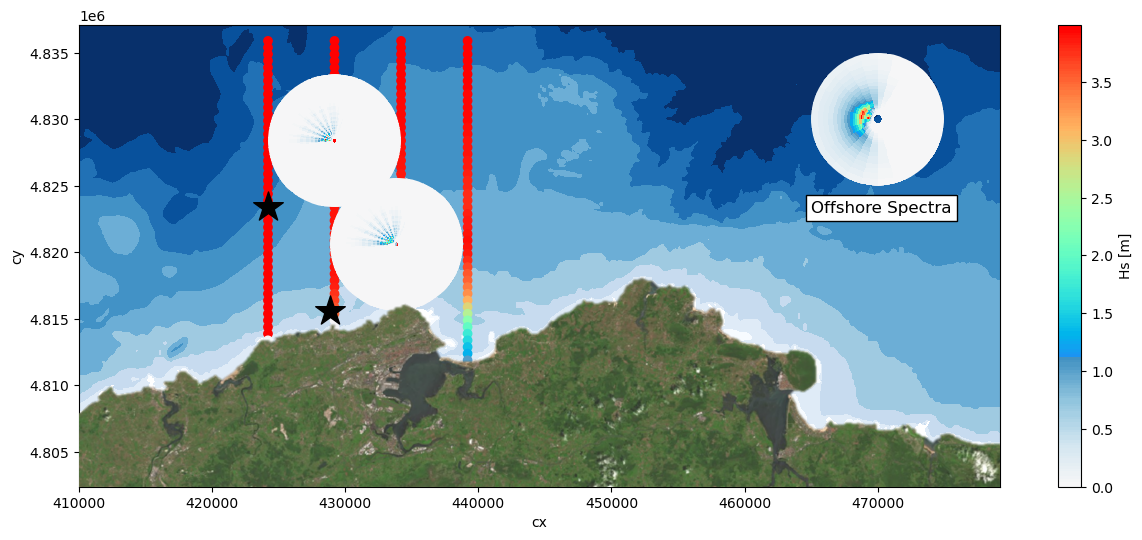

In [4]:
import xarray as xr
import matplotlib.image as mimg
from utils.plotting import plot_spectrum_in_coastline

time_to_plot = "2010-02-20 12:00"

# Plot the spectrum along the coastline
bathy = xr.open_dataset("outputs/bathymetry_100m.nc").elevation.T
ortophoto = mimg.imread("outputs/ortophoto_cantabria.png")
plot_spectrum_in_coastline(
    bathy=bathy,
    reconstructed_onshore_spectra=reconstructed_onshore_spectra.rename({"kps": "kp"}),
    reconstruction_kps=kp_coeffs,
    offshore_spectra=offshore_spectra,
    time_to_plot=time_to_plot,
    sites_for_spectrum=[100, 280],
    ortophoto=ortophoto,
)